# Geospatial Data Visualization

In [4]:
# Import necessary modules

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.ticker as mticker

In [5]:
# --- 1. Load a Sample Dataset ---
# We'll use the example ERA5 dataset provided by xarray, which includes temperature data.
# This dataset has spatial (latitude, longitude) and temporal (time) dimensions.

# Open the dataset
ds = xr.tutorial.load_dataset("air_temperature")

In [6]:
# --- 2. Select a Time Slice ---
# Let's pick a specific time to visualize the temperature distribution.
# For this example, we'll select the first time step.
time_slice = ds.isel(time=0)  # Select the first time index

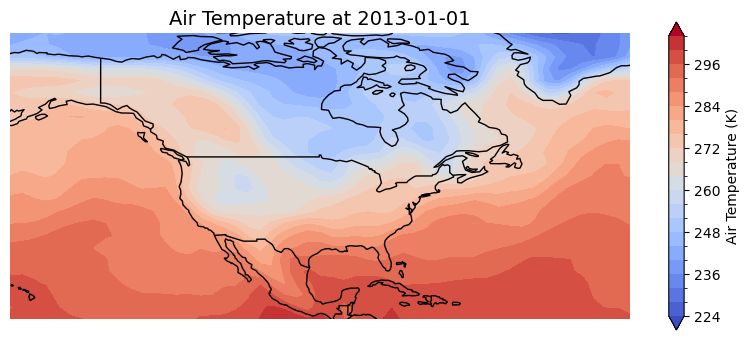

In [7]:
# --- 3. Visualize the Data ---
# We'll create a map to visualize the air temperature at the selected time.

# Create a figure and axes with a specific projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  # Use PlateCarree projection

# Add coastlines and borders for context
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Create a filled contour plot of the air temperature
# 'time_slice.air' selects the air temperature data from our time slice
#  cmap='coolwarm' sets the color map to show temperature differences (blue for cold, red for hot)
#  levels=20  specifies the number of contour levels
contour_plot = time_slice.air.plot.contourf(
    ax=ax,
    transform=ccrs.PlateCarree(),  # Ensure data is plotted in the correct projection
    cmap='coolwarm',
    levels=20,
    cbar_kwargs={'shrink': 0.5, 'label': 'Air Temperature (K)'}, #make the colorbar small, and add text
    extend='both',  # Add arrows to the colorbar for values outside the specified range
)

# Set the title of the plot, including the time of the slice
ax.set_title(f'Air Temperature at {str(time_slice.time.values)[:10]}', fontsize=14) # show only the date

#remove axes
plt.axis('off')
#show plot
plt.show()

## Explore the Data
* Try changing the time slice (e.g., time=1, time=5, time=-1). How does the temperature distribution change?
* Explore different color maps (e.g., cmap='viridis', cmap='plasma', cmap='cividis').
* Add more features to the map, such as rivers or lakes.
* Create an animation to visualize how the temperature changes over time.
* Calculate the average temperature over a specific region.